In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Introduction
- The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. 
- The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.
- The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. 
- So the functional API is a way to build graphs of layers.

Consider the following model:  
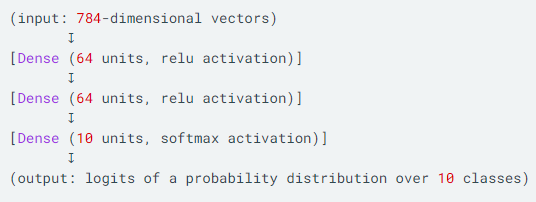

This is a basic graph with three layers. To build this model using the functional API, start by creating an input node:

In [2]:
inputs = keras.Input(shape=(784,))
# The shape of the data is set as a 784-dimensional vector. 
# The batch size is always omitted since only the shape of each sample is specified.
# If, for example, you have an image input with a shape of (32, 32, 3), you would use:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

# The inputs that is returned contains information about the shape and dtype of the input data that you feed to your model. 
# Here's the shape:
print(inputs.shape)
# Here's the dtype
print(inputs.dtype)

# You create a new node in the graph of layers by calling a layer on this inputs object:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
# The "layer call" action is like drawing an arrow from "inputs" to this layer you created. 
# You're "passing" the inputs to the dense layer, and you get x as the output.
# Let's add a few more layers to the graph of layers:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
# At this point, you can create a Model by specifying its inputs and outputs in the graph of layers:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
# Let's check out what the model summary looks like:
model.summary()

(None, 784)
<dtype: 'float32'>
Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# You can also plot the model as a graph:
keras.utils.plot_model(model, "my_first_model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [4]:
# And, optionally, display the input and output shapes of each layer in the plotted graph:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Training, Evaluationd adn Inference
